In [1]:
## Load libraries
import numpy as np
import pandas as pd
import glob
import json

In [ ]:
import matplotlib.pyplot as plt
import pycountry

In [3]:
## Load data -> The files have a simmilar structure in their path so I'll read all of them in just one step
path_pattern = r"C:\Users\Aiza\Documents\Proyectos personales\Data de Spoti\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_*.json"
files_json = glob.glob(path_pattern)
# Read the files and load contetn
# for files in files_json:
#     with open(files, encoding='utf-8') as f:
#         data = json.load(f)
#         print(data) 

# try of reading a file
# algo = pd.read_json(r"C:\Users\Aiza\Documents\Proyectos personales\Data de Spoti\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2024-2025_8.json")
# print(algo.to_string)

data

In [ ]:
# read all data
all_data = []

for file_path in files_json:
    with open(file_path, encoding='utf-8') as f:
        data = json.load(f)
        all_data.extend(data)  # Añadir elementos de cada archivo a la lista

df = pd.DataFrame(all_data)
print(df.head())

                     ts             platform  ms_played conn_country  \
0  2014-02-05T22:52:28Z  iOS 6.1.5 (iPod4,1)     240653           MX   
1  2014-02-05T22:56:00Z  iOS 6.1.5 (iPod4,1)     211706           MX   
2  2014-02-05T23:02:01Z  iOS 6.1.5 (iPod4,1)     361306           MX   
3  2014-02-05T23:03:40Z  iOS 6.1.5 (iPod4,1)      70449           MX   
4  2014-02-05T23:03:59Z  iOS 6.1.5 (iPod4,1)      18575           MX   

          ip_addr            master_metadata_track_name  \
0  187.232.136.54                    Make Someone Happy   
1  187.232.136.54                              Our Love   
2  187.232.136.54              Everytime We Say Goodbye   
3  187.232.136.54                            Time Alone   
4  187.232.136.54  Half A Moon (Is Better Than No Moon)   

     master_metadata_album_artist_name master_metadata_album_album_name  \
0                        Sophie Milman               Make Someone Happy   
1                       Gregory Porter                        

In [5]:
df.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2014-02-05T22:52:28Z,"iOS 6.1.5 (iPod4,1)",240653,MX,187.232.136.54,Make Someone Happy,Sophie Milman,Make Someone Happy,spotify:track:4DFq2npjpLUDkvuEm1JCmv,None,...,None,None,None,,trackdone,False,False,False,NaN,False
1,2014-02-05T22:56:00Z,"iOS 6.1.5 (iPod4,1)",211706,MX,187.232.136.54,Our Love,Gregory Porter,Be Good,spotify:track:6LVN17mlCzia0EhbW9J1mj,None,...,None,None,None,trackdone,trackdone,True,False,False,NaN,False
2,2014-02-05T23:02:01Z,"iOS 6.1.5 (iPod4,1)",361306,MX,187.232.136.54,Everytime We Say Goodbye,Karrin Allyson,Ballads,spotify:track:1Bh6O68WlWPtnm7aFIJBHL,None,...,None,None,None,trackdone,trackdone,True,False,False,NaN,False
3,2014-02-05T23:03:40Z,"iOS 6.1.5 (iPod4,1)",70449,MX,187.232.136.54,Time Alone,Eliane Elias,Dreamer,spotify:track:7Jt9DpsKlKRcR3RI9qUl9w,None,...,None,None,None,trackdone,,True,True,False,NaN,False
4,2014-02-05T23:03:59Z,"iOS 6.1.5 (iPod4,1)",18575,MX,187.232.136.54,Half A Moon (Is Better Than No Moon),Nat Shilkret & The Victor Orchestra,That Was The Year - 1926,spotify:track:59RmJ4pnF478zWV0oeC5y4,None,...,None,None,None,,unknown,False,True,False,NaN,False


In [11]:
display(df.describe())
print(df.dtypes)
print(df.columns)

,ms_played,offline_timestamp
count,1.367710e+05,6.643800e+04
mean,1.654864e+05,3.563031e+11
std,2.945337e+05,6.701463e+11
min,0.000000e+00,1.664703e+09
25%,9.482800e+04,1.692987e+09
50%,1.628740e+05,1.718142e+09
75%,2.091050e+05,1.742212e+09
max,4.295808e+07,1.665601e+12


ts                                    object
platform                              object
ms_played                              int64
conn_country                          object
ip_addr                               object
master_metadata_track_name            object
master_metadata_album_artist_name     object
master_metadata_album_album_name      object
spotify_track_uri                     object
episode_name                          object
episode_show_name                     object
spotify_episode_uri                   object
audiobook_title                       object
audiobook_uri                         object
audiobook_chapter_uri                 object
audiobook_chapter_title               object
reason_start                          object
reason_end                            object
shuffle                                 bool
skipped                                 bool
offline                                 bool
offline_timestamp                    float64
incognito_

In [17]:
# change the ts to a time series type (date type)
df['date'] = pd.to_datetime(df['ts'])
print(df['date'])
print("Min date: ", min(df['date']))
print("Max date: " ,max(df['date']))

0        2014-02-05 22:52:28+00:00
1        2014-02-05 22:56:00+00:00
2        2014-02-05 23:02:01+00:00
3        2014-02-05 23:03:40+00:00
4        2014-02-05 23:03:59+00:00
                    ...           
136766   2025-04-25 20:58:04+00:00
136767   2025-04-25 21:01:02+00:00
136768   2025-04-25 21:04:10+00:00
136769   2025-04-25 21:07:17+00:00
136770   2025-04-25 21:29:46+00:00
Name: date, Length: 136771, dtype: datetime64[ns, UTC]
Min date:  2014-02-05 22:52:28+00:00
Max date:  2025-04-25 21:29:46+00:00


<Axes: >

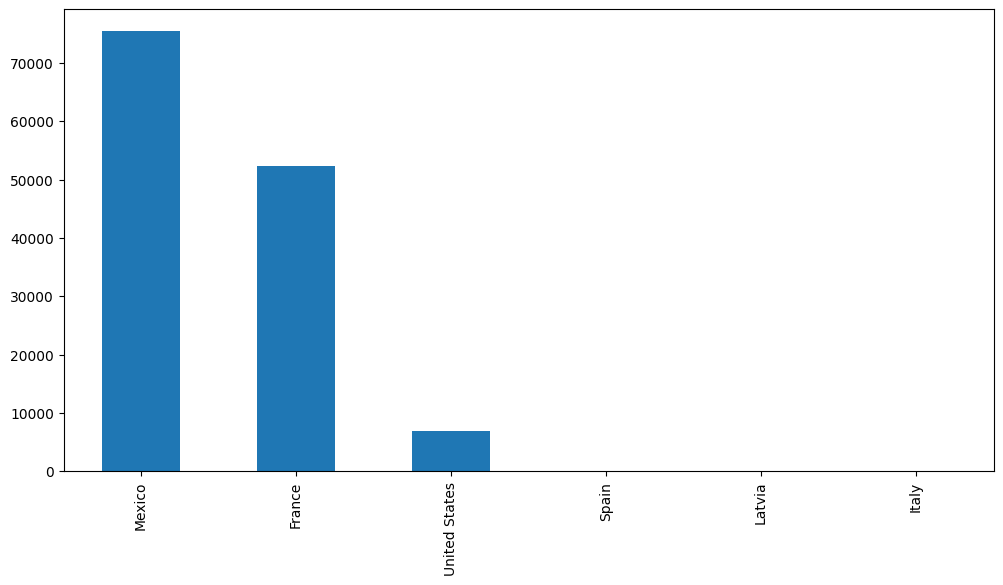

In [24]:
# Función para convertir código ISO a nombre de país
def iso_to_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return None  # O 'Desconocido', si prefieres
df['countryName'] = df['conn_country'].apply(iso_to_country_name)
difcountries = df['countryName'].value_counts()
difcountries.plot(kind = 'bar', figsize=(12, 6))

In [31]:
shownames = df['episode_show_name'].value_counts()
print(shownames)

Telokwento TLK                                          284
Gastropod                                               272
Twenty Thousand Hertz                                   193
12 Hour Sound Machines for Sleep (no loops or fades)    184
Even The Royals                                         139
                                                       ... 
Not Lost                                                  1
Amateur Traveler Travel Podcast                           1
Stories from Theo and Matt                                1
Bedtime Stories - Princesses!                             1
The Best Idea Yet                                         1
Name: episode_show_name, Length: 203, dtype: int64


In [ ]:
## Divide dataset in podcasts and music
dfMusic = df[df['episode_show_name'].isna()]
dfPodcasts = df[df['episode_show_name'].notna()]
dfAudioBook = df[df['audiobook_title'].notna()]

print(dfMusic.head())
print(dfPodcasts.head())
print(dfAudioBook.head())

                     ts             platform  ms_played conn_country  \
0  2014-02-05T22:52:28Z  iOS 6.1.5 (iPod4,1)     240653           MX   
1  2014-02-05T22:56:00Z  iOS 6.1.5 (iPod4,1)     211706           MX   
2  2014-02-05T23:02:01Z  iOS 6.1.5 (iPod4,1)     361306           MX   
3  2014-02-05T23:03:40Z  iOS 6.1.5 (iPod4,1)      70449           MX   
4  2014-02-05T23:03:59Z  iOS 6.1.5 (iPod4,1)      18575           MX   

          ip_addr            master_metadata_track_name  \
0  187.232.136.54                    Make Someone Happy   
1  187.232.136.54                              Our Love   
2  187.232.136.54              Everytime We Say Goodbye   
3  187.232.136.54                            Time Alone   
4  187.232.136.54  Half A Moon (Is Better Than No Moon)   

     master_metadata_album_artist_name master_metadata_album_album_name  \
0                        Sophie Milman               Make Someone Happy   
1                       Gregory Porter                        

In [40]:
dfMusic.to_csv(r'C:\Users\Aiza\Documents\Proyectos personales\Data de Spoti\CleanData\MusicDataset.csv', index=False)
dfPodcasts.to_csv(r'C:\Users\Aiza\Documents\Proyectos personales\Data de Spoti\CleanData\PodcastsDataset.csv', index=False)
dfAudioBook.to_csv(r'C:\Users\Aiza\Documents\Proyectos personales\Data de Spoti\CleanData\AudioBookDataset.csv', index=False)

In [ ]:
# # Cargar el archivo JSON como diccionario
# with open(r"C:\Users\Aiza\Documents\Proyectos personales\Data de Spoti\my_spotify_data\Spotify Extended Streaming History\Streaming_History_Audio_2024-2025_8.json", encoding='utf-8') as f:
#     data = json.load(f)

# # Convertir el diccionario a DataFrame
# df = pd.DataFrame(data)

# # Mostrar las primeras filas del DataFrame
# print(df.head())